## Importing Libraries

In [1]:
import os
import wget
import glob
import random
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

%matplotlib inline

Using TensorFlow backend.


## Downloading Data

In [ ]:
path = os.getcwd()+"\data\cat-dog.zip"
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
train = wget.download(url, out = path)

## Extracting Data

In [ ]:
local_zip = 'data/cat-dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

## Defining Directories and Labelling

In [2]:
base_dir = 'data\cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Building Model

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compiling Model

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Previous Preprocessing
Preprocessing and training the model to validating it hence visualising training and validation accuracy and loss.

In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fitting

In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
Epoch 1/15
100/100 - 74s - loss: 0.4302 - acc: 0.8010 - val_loss: 0.5577 - val_acc: 0.7150
Epoch 2/15
Epoch 1/15
100/100 - 76s - loss: 0.3946 - acc: 0.8275 - val_loss: 0.5166 - val_acc: 0.7470
Epoch 3/15
Epoch 1/15
100/100 - 76s - loss: 0.3617 - acc: 0.8465 - val_loss: 0.5602 - val_acc: 0.7140
Epoch 4/15
Epoch 1/15
100/100 - 76s - loss: 0.3460 - acc: 0.8515 - val_loss: 0.5833 - val_acc: 0.7180
Epoch 5/15
Epoch 1/15
100/100 - 75s - loss: 0.3213 - acc: 0.8655 - val_loss: 0.5325 - val_acc: 0.7410
Epoch 6/15
Epoch 1/15
100/100 - 76s - loss: 0.2921 - acc: 0.8805 - val_loss: 0.5473 - val_acc: 0.7500
Epoch 7/15
Epoch 1/15
100/100 - 78s - loss: 0.2667 - acc: 0.8990 - val_loss: 0.5469 - val_acc: 0.7460
Epoch 8/15
Epoch 1/15
100/100 - 78s - loss: 0.2492 - acc: 0.8970 - val_loss: 0.5538 - val_acc: 0.7500
Epoch 9/15
Epoch 1/15
100/100 - 78s - loss: 0.2196 - acc: 0.9115 - val_loss: 0.5908 - val_acc: 0.7610
Epoch 10/15
Epoch 1/15
100/100 - 77s - loss: 0.2022 - acc: 0.9175 - val_loss: 0.59

## Visualising Traing and Validation Accuracy and Loss

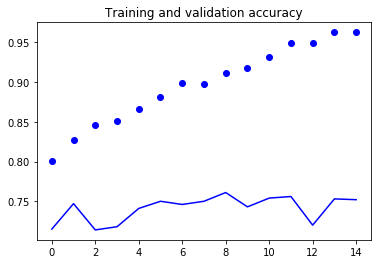

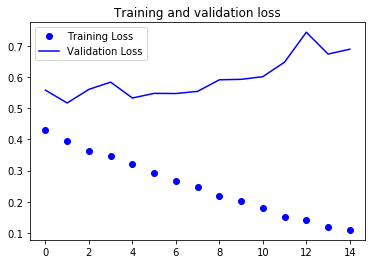

In [10]:
def visualise_acc_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
visualise_acc_loss(history)

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

## Preprocessing with Augmentation

In [11]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fitting

In [12]:
history_aug = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
Epoch 1/15
100/100 - 100s - loss: 0.6623 - acc: 0.6740 - val_loss: 0.4965 - val_acc: 0.7580
Epoch 2/15
Epoch 1/15
100/100 - 77s - loss: 0.5748 - acc: 0.6975 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 3/15
Epoch 1/15
100/100 - 78s - loss: 0.5696 - acc: 0.7145 - val_loss: 0.5254 - val_acc: 0.7260
Epoch 4/15
Epoch 1/15
100/100 - 77s - loss: 0.5571 - acc: 0.7180 - val_loss: 0.4772 - val_acc: 0.7750
Epoch 5/15
Epoch 1/15
100/100 - 78s - loss: 0.5490 - acc: 0.7060 - val_loss: 0.4940 - val_acc: 0.7620
Epoch 6/15
Epoch 1/15
100/100 - 78s - loss: 0.5544 - acc: 0.7085 - val_loss: 0.5304 - val_acc: 0.7160
Epoch 7/15
Epoch 1/15
100/100 - 78s - loss: 0.5359 - acc: 0.7400 - val_loss: 0.4713 - val_acc: 0.7720
Epoch 8/15
Epoch 1/15
100/100 - 78s - loss: 0.5353 - acc: 0.7300 - val_loss: 0.5134 - val_acc: 0.7440
Epoch 9/15
Epoch 1/15
100/100 - 78s - loss: 0.5281 - acc: 0.7440 - val_loss: 0.4608 - val_acc: 0.7860
Epoch 10/15
Epoch 1/15
100/100 - 78s - loss: 0.5157 - acc: 0.7385 - val_loss: 0.5

## Visualise Taining and Validation Accuracy and Loss

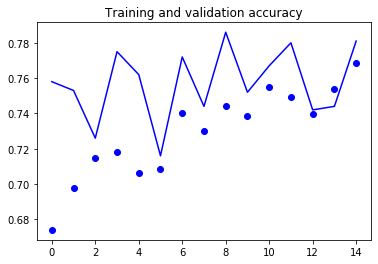

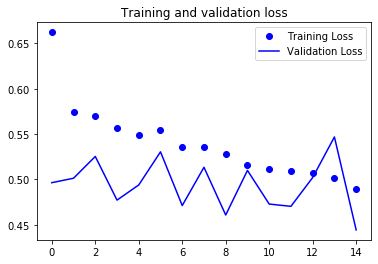

In [13]:
visualise_acc_loss(history_aug)

## Variation of Preprocessing with Augmentation

In [14]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fitting

In [15]:
history_aug_new = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
Epoch 1/15
100/100 - 78s - loss: 0.5122 - acc: 0.7505 - val_loss: 0.4576 - val_acc: 0.7830
Epoch 2/15
Epoch 1/15
100/100 - 76s - loss: 0.5097 - acc: 0.7435 - val_loss: 0.4593 - val_acc: 0.7780
Epoch 3/15
Epoch 1/15
100/100 - 75s - loss: 0.4980 - acc: 0.7625 - val_loss: 0.4657 - val_acc: 0.7780
Epoch 4/15
Epoch 1/15
100/100 - 76s - loss: 0.4947 - acc: 0.7560 - val_loss: 0.4534 - val_acc: 0.7940
Epoch 5/15
Epoch 1/15
100/100 - 78s - loss: 0.4928 - acc: 0.7645 - val_loss: 0.4406 - val_acc: 0.8030
Epoch 6/15
Epoch 1/15
100/100 - 77s - loss: 0.4798 - acc: 0.7790 - val_loss: 0.4410 - val_acc: 0.8050
Epoch 7/15
Epoch 1/15
100/100 - 75s - loss: 0.4749 - acc: 0.7785 - val_loss: 0.6535 - val_acc: 0.7010
Epoch 8/15
Epoch 1/15
100/100 - 75s - loss: 0.4883 - acc: 0.7675 - val_loss: 0.4413 - val_acc: 0.7960
Epoch 9/15
Epoch 1/15
100/100 - 77s - loss: 0.4717 - acc: 0.7715 - val_loss: 0.4443 - val_acc: 0.7910
Epoch 10/15
Epoch 1/15
100/100 - 77s - loss: 0.4673 - acc: 0.7800 - val_loss: 0.45

## Visualise Taining and Validation Accuracy and Loss

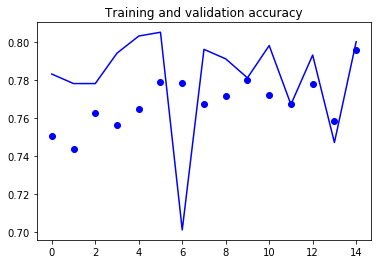

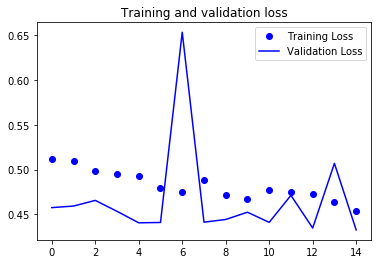

In [16]:
visualise_acc_loss(history_aug_new)